# ALDI an Oasis in Food Desserts

#### Caveats
1. Table of content anchors do not work on GitHub
2. library geospanda does not load on IBM cognitiveclass jupyterlab

## Table of Contents
1. [Introduction](#Introduction)
    1. [Import Necessary Libraries](#ImportNecessaryLibraries)
    2. [Import Chicago Shapefile ](#ImportChicago)
    3. [Import Chicago Neighborhood Map](#ImportNeighborhood)
2. [Download Food Access Data](#DownloadFoodAccess)
    1. [Get Chicago limited food access neighborhoods](#GetChicagolimitedfoodaccessneighborhoods)
    3. <a href="#item3">Explore a User</a>  
    4. <a href="#item4">Foursquare API Explore Function</a>  
    5. <a href="#item5">Get Trending Venues</a> 

## Introduction <a class = "anchor" id = "Introduction"></a>

In this project we will explore ALDI's expansion into "Food Deserts" in the City of Chicago. The food deserts were based on the 2010 census. Since that census ALDI's has placed supermarkets in Chicago neighborhoods that contained food deserts. The stores introduced since 2010 make the area no longer a food desert by definition in that a food desert does not contain a supermarket which ALDI is.

The Chicago shape files and the Chicago neighborhood files are on the  https://data.cityofchicago.org website

### Import Necessary Libraries<a name = "anchor" id = "ImportNecessaryLibraries"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
import folium
from IPython.display import display
import xlrd 

### Import Chicago Shapefile<a name = "anchor" id = "ImportChicago"></a>

In [2]:
url = "https://data.cityofchicago.org/api/geospatial/ewy2-6yfk?method=export&format=Shapefile"
Chicago_shape = gpd.read_file(url)
Chicago_shape

,name,objectid,shape_area,shape_len,geometry
0,CHICAGO,1.0,6.450277e+09,845282.931362,"MULTIPOLYGON (((-87.93514 42.00089, -87.93521 ..."


Text(0.5, 0.98, 'CHICAGO')

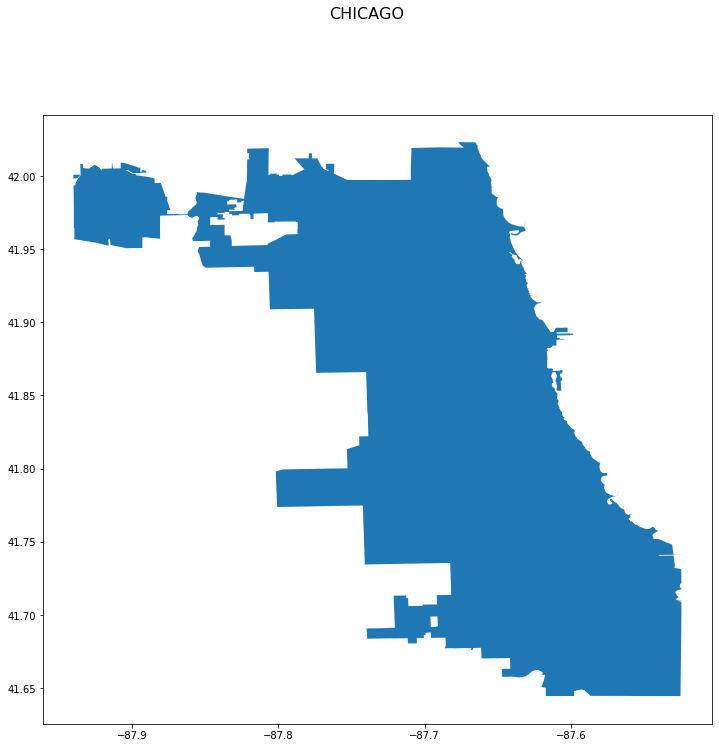

In [3]:
f, ax = plt.subplots(1, figsize=(12,12))
Chicago_shape.plot(ax=ax)
f.suptitle('CHICAGO', fontsize=16)

In [4]:
Chicago_shape.total_bounds 

array([-87.94011408,  41.64454312, -87.5241371 ,  42.02303859])

In [5]:
# Get the center
Chicago_shape.centroid
# need to put latitude 41.83...first

0    POINT (-87.68665 41.83772)
dtype: geometry

### Import Chicago Neighborhood Map<a name = "anchor" id = "ImportNeighborhood"></a>

In [6]:
url = "https://data.cityofchicago.org/api/geospatial/bbvz-uum9?method=export&format=Shapefile"
neighbor_boundary = gpd.read_file(url)

In [7]:
display(neighbor_boundary.head())

,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
1,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,"POLYGON ((-87.62761 41.87437, -87.62760 41.873..."
2,United Center,UNITED CENTER,3.252051e+07,23101.363745,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745,"POLYGON ((-87.65833 41.92166, -87.65835 41.922..."
4,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,"POLYGON ((-87.74060 41.88782, -87.74060 41.887..."


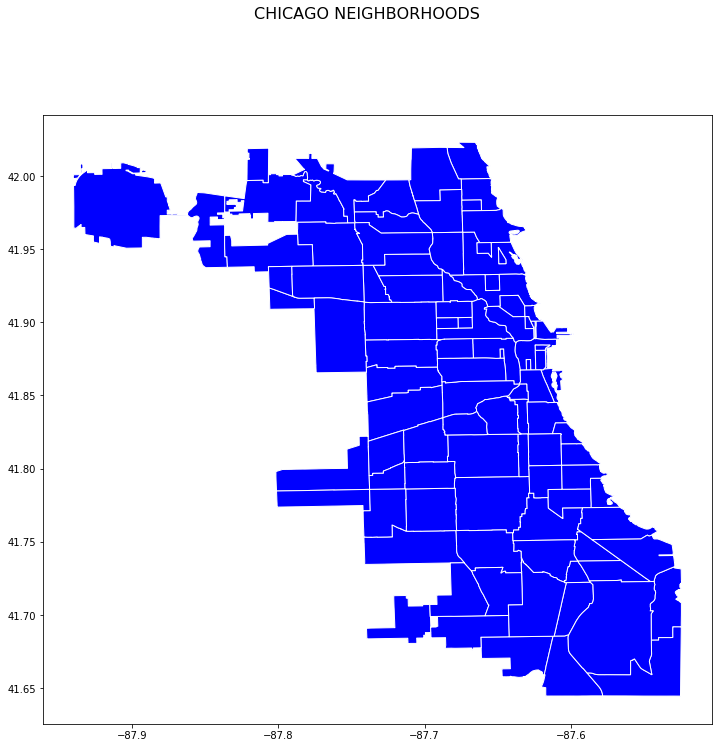

In [8]:
f, ax = plt.subplots(1, figsize=(12,12), linewidth=1.5)

neighbor_boundary.plot(figsize=(12,12), facecolor = 'blue', edgecolor = 'white', ax=ax)
f = f.suptitle('CHICAGO NEIGHBORHOODS', fontsize=16)

#### Label the neighborhoods

            pri_neigh           sec_neigh    shape_area     shape_len  \
0     Grand Boulevard         BRONZEVILLE  4.849250e+07  28196.837157   
1        Printers Row        PRINTERS ROW  2.162138e+06   6864.247156   
2       United Center       UNITED CENTER  3.252051e+07  23101.363745   
3  Sheffield & DePaul  SHEFFIELD & DEPAUL  1.048259e+07  13227.049745   
4       Humboldt Park       HUMBOLDT PARK  1.250104e+08  46126.751351   

                                            geometry  \
0  POLYGON ((-87.60671 41.81681, -87.60670 41.816...   
1  POLYGON ((-87.62761 41.87437, -87.62760 41.873...   
2  POLYGON ((-87.66707 41.88885, -87.66707 41.888...   
3  POLYGON ((-87.65833 41.92166, -87.65835 41.922...   
4  POLYGON ((-87.74060 41.88782, -87.74060 41.887...   

                                     coords  
0   (-87.61783034092667, 41.81293605136193)  
1  (-87.62904214188208, 41.871062067348326)  
2   (-87.67952022458485, 41.88216441534508)  
3   (-87.65367030070429, 41.927181866062

Text(0.5, 1, 'Naming The Chicago Neighborhoods')

<Figure size 432x288 with 0 Axes>

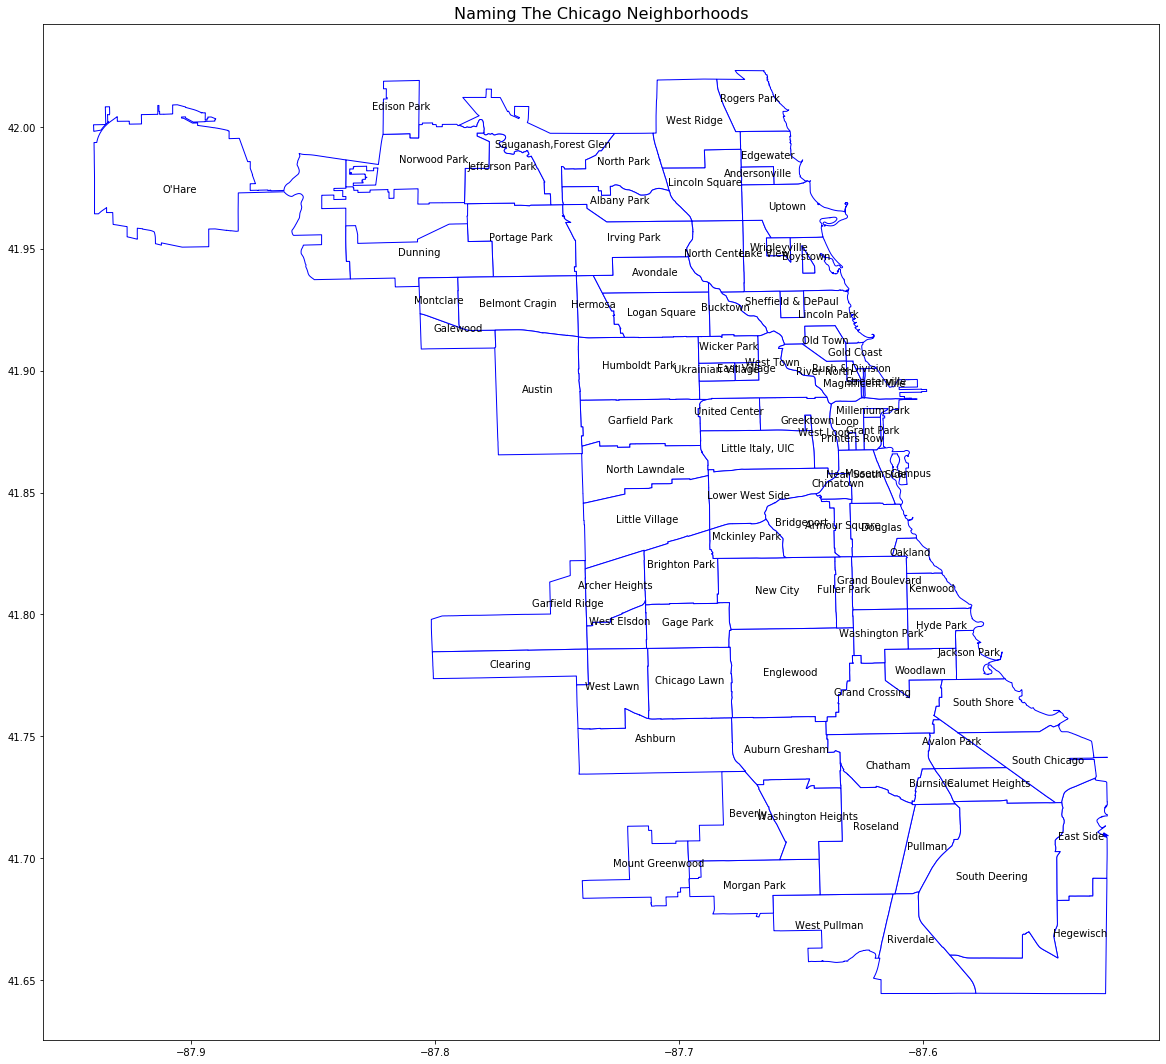

In [9]:
#Labeling Technique from https://stackoverflow.com/questions/38899190/geopandas-label-polygons
neighbor_boundary['coords'] = neighbor_boundary['geometry'].apply(lambda x: x.representative_point().coords[:])
neighbor_boundary['coords'] = [coords[0] for coords in neighbor_boundary['coords']]
print(neighbor_boundary.head())
neighbor_boundary.plot(figsize=(20,20),  ax=ax, linewidth=1.5)
ax = neighbor_boundary.plot(figsize=(20,20), facecolor = 'white', edgecolor = 'blue')

#neighborhoods_PPFD.plot()
for idx, row in neighbor_boundary.iterrows():
    plt.annotate(s=row['pri_neigh'], xy=row['coords'],
                 horizontalalignment='center')
plt.title(label='Naming The Chicago Neighborhoods', fontsize=16)


In [10]:
#lets add the centroid to the neighborhood gdf so we willhave a single location for the neighborhood

neighbor_boundary['centroid'] = neighbor_boundary["geometry"].centroid
neighbor_boundary.centroid

0     POINT (-87.61786 41.81295)
1     POINT (-87.62903 41.87098)
2     POINT (-87.67914 41.88197)
3     POINT (-87.65367 41.92719)
4     POINT (-87.71651 41.90089)
                 ...            
93    POINT (-87.76550 41.92726)
94    POINT (-87.75801 41.89065)
95    POINT (-87.62710 41.90601)
96    POINT (-87.64745 41.94392)
97    POINT (-87.64132 41.89902)
Length: 98, dtype: geometry

## Download Food Access Data<a name= "anchor" id = "DownloadFoodAccess"></a>

In [11]:
# Process: Download Food Access data from  https://www.ERS.usda.gov/data-products/food-access-research-atlas/download-the-data/ 
# ERS has the data in an excel data set of the Food Access of all the states in the US. From this I extracted Illinois data  
# and then extracted Cook County from the Illinois data. 
# Cook county is in Illinois. From Cook County extract only Chicago data. Chicago is only one of the cities in Cook county
# I then imported Cook County Census track information  on food Desert

#Cook_food_access=pd.read_excel(r'C:\Users\Henry\Desktop\Coursera\DecisionScience\Capstone\Coursera_Capstone\Cook03.xlsx')

In [12]:
Cook_food_access= pd.read_excel(r'Cook03.xlsx')

In [13]:
Cook_food_access.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_halfAnd10,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome
0,17031010100,Illinois,Cook,1,4854,2302,0,218,0.044911,1,1,1,29.7,44826
1,17031010201,Illinois,Cook,1,6450,2463,0,163,0.025271,0,0,1,32.8,43321
2,17031010202,Illinois,Cook,1,2818,1115,0,315,0.111781,0,0,1,30.6,46713
3,17031010300,Illinois,Cook,1,6236,2826,0,791,0.126844,1,1,1,26.8,48351
4,17031010400,Illinois,Cook,1,5042,2098,0,1349,0.267553,0,0,0,17.2,73491


In [14]:
Cook_food_access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 14 columns):
CensusTract             1316 non-null int64
State                   1316 non-null object
County                  1316 non-null object
Urban                   1316 non-null int64
POP2010                 1316 non-null int64
OHU2010                 1316 non-null int64
GroupQuartersFlag       1316 non-null int64
NUMGQTRS                1316 non-null int64
PCTGQTRS                1316 non-null float64
LILATracts_halfAnd10    1316 non-null int64
HUNVFlag                1316 non-null int64
LowIncomeTracts         1316 non-null int64
PovertyRate             1316 non-null float64
MedianFamilyIncome      1316 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 144.1+ KB


### Get Chicago  limited food access neighborhoods<a name ="anchor" id="GetChicagolimitedfoodaccessneighborhoods"></a>
1. intersect food_access_info censustracts for Cook County (Cook2) with Chicago Boundaries Geode = 
    Only Chicago  food access CEnsusTracts
2. Intersect Chcago Boundaries with the neighborhoods using  Geometry Chicago NeighborHoods.

#### Reference for  US CensusTracts: https://www2.census.gov/geo/pdfs/education/CensusTracts.pdf
Census tracts are small, relatively permanent statistical subdivisions of a United States county.
1. Average 4000 people
2. Maximum 8000 people
3. Minimum 1200 people

In [15]:
url= 'https://data.cityofchicago.org/api/geospatial/5jrd-6zik?method=export&format=Shapefile'
Chicago_census_tract = gpd.read_file(url)

In [16]:
Chicago_census_tract.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
commarea      801 non-null object
commarea_n    801 non-null float64
countyfp10    801 non-null object
geoid10       801 non-null object
name10        801 non-null object
namelsad10    801 non-null object
notes         12 non-null object
statefp10     801 non-null object
tractce10     801 non-null object
geometry      801 non-null geometry
dtypes: float64(1), geometry(1), object(8)
memory usage: 62.7+ KB


In [17]:
Chicago_census_tract.head()

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."


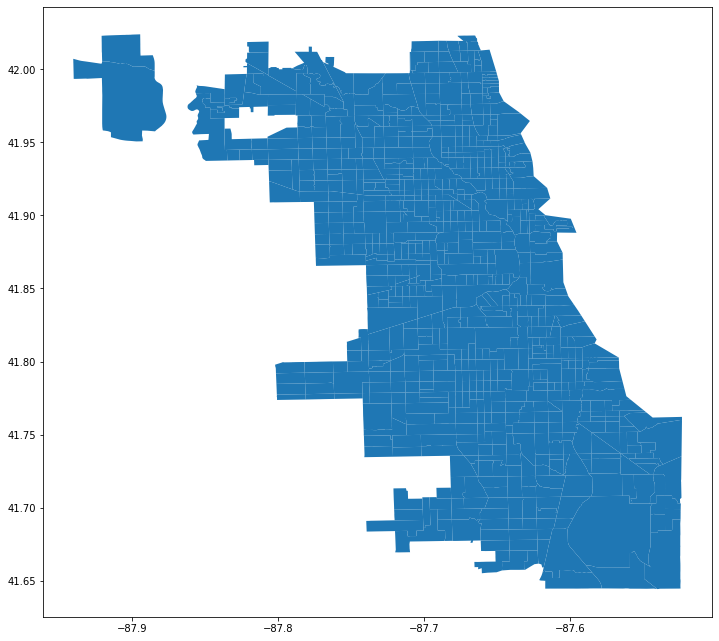

In [18]:
Chicago_census_tract.plot(figsize=(12,12), linewidth=1.5)

In [19]:
#rename geoid10 to CensusTract

Chicago_census_tract_CensusTract = Chicago_census_tract.rename(columns = {'geoid10':'CensusTract'})
display(Chicago_census_tract_CensusTract.head())
#convert CensusTract to int64
Chicago_census_tract_CensusTract['CensusTract'] = Chicago_census_tract_CensusTract['CensusTract'].astype('int64')
Chicago_census_tract_CensusTract.info()

,commarea,commarea_n,countyfp10,CensusTract,name10,namelsad10,notes,statefp10,tractce10,geometry
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
commarea       801 non-null object
commarea_n     801 non-null float64
countyfp10     801 non-null object
CensusTract    801 non-null int64
name10         801 non-null object
namelsad10     801 non-null object
notes          12 non-null object
statefp10      801 non-null object
tractce10      801 non-null object
geometry       801 non-null geometry
dtypes: float64(1), geometry(1), int64(1), object(7)
memory usage: 62.7+ KB


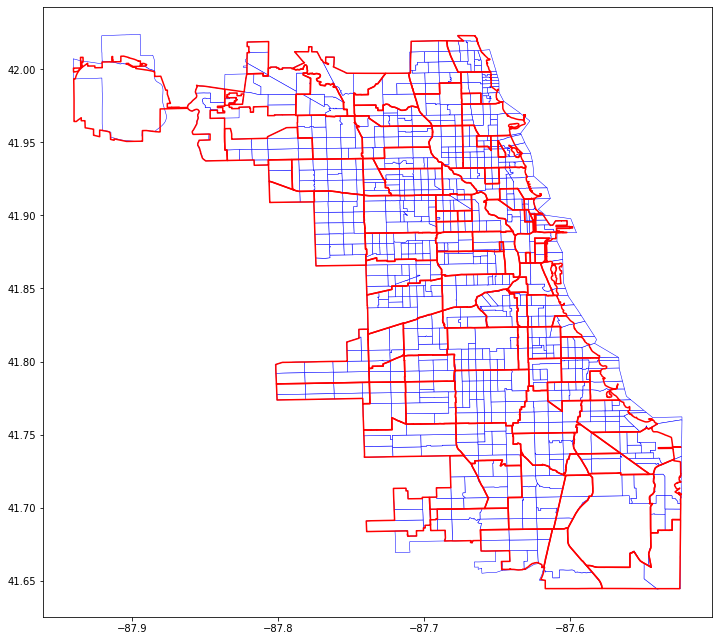

In [20]:
#we can now plot Chicago_census tract over Neighborhood
plot4 = Chicago_census_tract.plot(figsize=(12,12), edgecolor='blue', facecolor = 'white', linewidth =.5)
plot3 = neighbor_boundary.plot(figsize=(12,12), edgecolor = 'red', facecolor='None',  ax= plot4, linewidth=1.5)


###  limited food access Chicago neighborhoods
1. intersect food_access_info censustracts for Cook County (Cook2) with Chicago Boundaries Geoide = 
    Only Chicago  food access censusTracts
2. Intersect Chcago Boundaries with the neighborhoods using  Geometry Chicago Neighborhoods.
3. Select census tracts that have income in the range of greater than 26000 and less than 44000


In [21]:
### intersect (innerjoin) Cook_food_access_info with Chicago censustracts(low income/low access) 
#to get Only Chicago food desert CensusTracts in a income range of 26,000 to 44000

pd.set_option('display.max_rows', 500)
LILA_tracts01_in_Chicago = pd.merge(Cook_food_access, Chicago_census_tract_CensusTract[['CensusTract','geometry']], on='CensusTract', how = 'inner')
LILA_tracts01_in_Chicago['CensusTract'] = LILA_tracts01_in_Chicago['CensusTract'].astype('int64')
LILA_tracts01_in_Chicago = LILA_tracts01_in_Chicago.loc[(LILA_tracts01_in_Chicago['LILATracts_halfAnd10'] == 1) &  
                                                        (LILA_tracts01_in_Chicago['MedianFamilyIncome'] > 26000) &
                                                        (LILA_tracts01_in_Chicago['MedianFamilyIncome'] < 44000)]

LILA_tracts01_in_Chicago.info()
display(LILA_tracts01_in_Chicago.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 30 to 798
Data columns (total 15 columns):
CensusTract             83 non-null int64
State                   83 non-null object
County                  83 non-null object
Urban                   83 non-null int64
POP2010                 83 non-null int64
OHU2010                 83 non-null int64
GroupQuartersFlag       83 non-null int64
NUMGQTRS                83 non-null int64
PCTGQTRS                83 non-null float64
LILATracts_halfAnd10    83 non-null int64
HUNVFlag                83 non-null int64
LowIncomeTracts         83 non-null int64
PovertyRate             83 non-null float64
MedianFamilyIncome      83 non-null int64
geometry                83 non-null geometry
dtypes: float64(2), geometry(1), int64(10), object(2)
memory usage: 10.4+ KB


,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_halfAnd10,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,geometry
30,17031030300,Illinois,Cook,1,3322,1393,0,0,0.00000,1,1,1,23.6,39643,"POLYGON ((-87.67470 41.99076, -87.67473 41.991..."
280,17031231500,Illinois,Cook,1,6039,1973,0,102,0.01689,1,1,1,43.8,26818,"POLYGON ((-87.72098 41.88802, -87.72179 41.887..."
302,17031242700,Illinois,Cook,1,2029,702,0,0,0.00000,1,1,1,33.0,26250,"POLYGON ((-87.70185 41.89560, -87.70212 41.895..."
316,17031250700,Illinois,Cook,1,6098,2052,0,0,0.00000,1,1,1,37.3,29238,"POLYGON ((-87.75828 41.90947, -87.75810 41.909..."
317,17031250800,Illinois,Cook,1,2488,763,0,0,0.00000,1,0,1,27.4,35997,"POLYGON ((-87.74849 41.90551, -87.74849 41.905..."


In [22]:
#there are 83 census tracts that are food deserts
from geopandas import GeoDataFrame
crs = {'init': 'epsg:4326'}
LILA_gdf = GeoDataFrame(LILA_tracts01_in_Chicago, geometry = 'geometry', crs=crs)
LILA_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 83 entries, 30 to 798
Data columns (total 15 columns):
CensusTract             83 non-null int64
State                   83 non-null object
County                  83 non-null object
Urban                   83 non-null int64
POP2010                 83 non-null int64
OHU2010                 83 non-null int64
GroupQuartersFlag       83 non-null int64
NUMGQTRS                83 non-null int64
PCTGQTRS                83 non-null float64
LILATracts_halfAnd10    83 non-null int64
HUNVFlag                83 non-null int64
LowIncomeTracts         83 non-null int64
PovertyRate             83 non-null float64
MedianFamilyIncome      83 non-null int64
geometry                83 non-null geometry
dtypes: float64(2), geometry(1), int64(10), object(2)
memory usage: 10.4+ KB


### 2015 Plot food deserts in Chicago Neighborhoods where family income is 26000 to 44000

<Figure size 432x288 with 0 Axes>

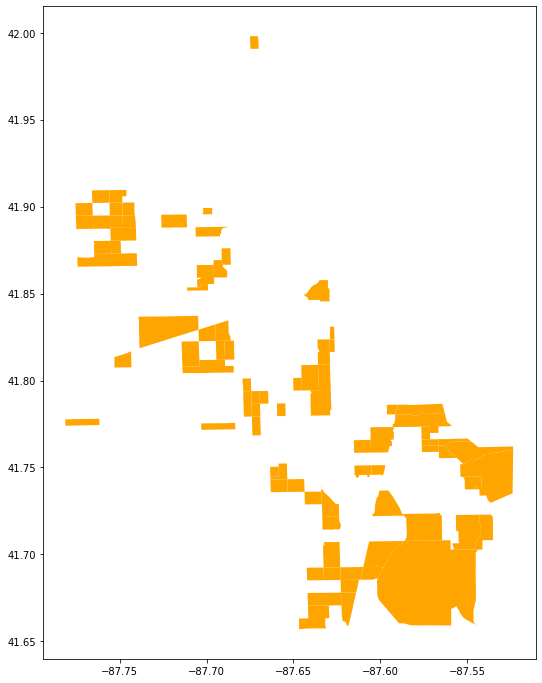

In [23]:
fig = plt.figure()
plot3 = LILA_gdf.plot(figsize=(12,12), facecolor = 'orange') # Neighborhoods with food deserts
#plt.show()

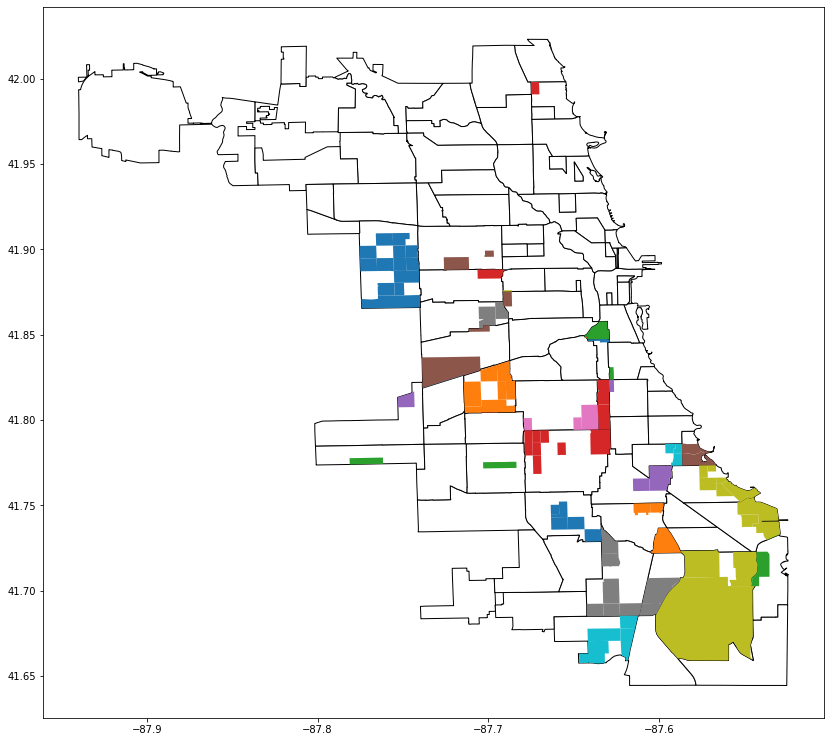

In [24]:
ax = neighbor_boundary.plot(figsize=(14,14), color = 'white', edgecolor='black')

 #intersection of neighborhoods and LILA
neighborhoods_PPFD = gpd.overlay( LILA_gdf, neighbor_boundary, how = 'intersection')

neighborhoods_PPFD.plot(figsize=(14,14),  column = 'pri_neigh', ax= ax)

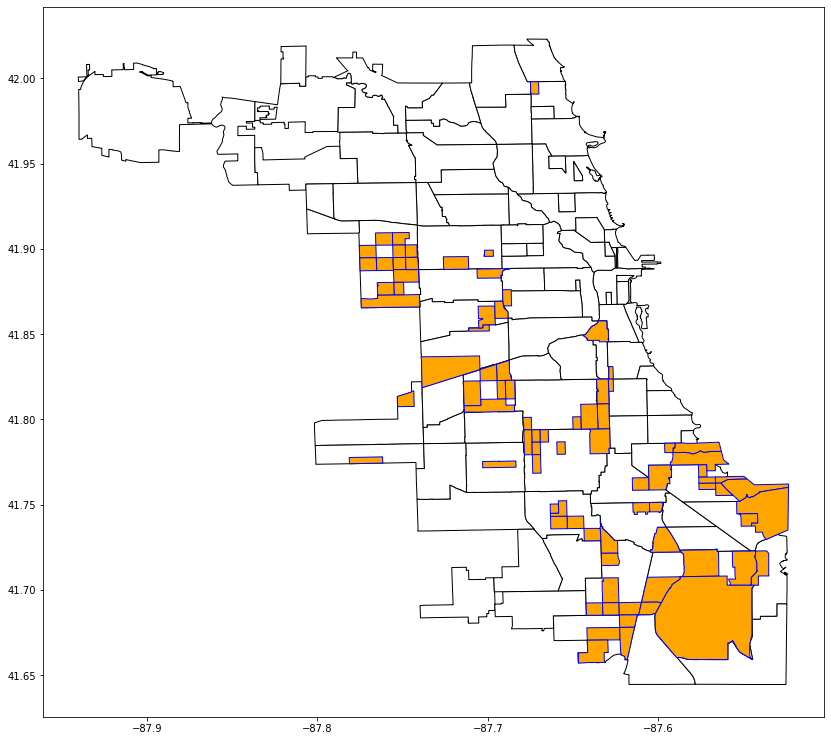

In [25]:
#lets get one color
ax = neighbor_boundary.plot(figsize=(14,14), color = 'white', edgecolor='black')
bx = LILA_gdf.plot( facecolor = 'orange', ax = ax, figsize=(14,14 ), edgecolor = 'blue' )
 #intersection of neighborhoods and LILA
cx = gpd.overlay( LILA_gdf, neighbor_boundary, how = 'intersection' )

In [26]:
#There are 188 food deserts in chicago neighborhoods
display(neighborhoods_PPFD.head())
neighborhoods_PPFD.info()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_halfAnd10,...,LowIncomeTracts,PovertyRate,MedianFamilyIncome,pri_neigh,sec_neigh,shape_area,shape_len,coords,centroid,geometry
0,17031030300,Illinois,Cook,1,3322,1393,0,0,0.00000,1,...,1,23.6,39643,Edgewater,EDGEWATER,3.886540e+07,31012.834160,"(-87.66382941909036, 41.987260277944216)",POINT (-87.66232 41.98840),"POLYGON ((-87.67470 41.99076, -87.67473 41.991..."
1,17031030300,Illinois,Cook,1,3322,1393,0,0,0.00000,1,...,1,23.6,39643,West Ridge,WEST RIDGE,9.842909e+07,43020.689458,"(-87.69394611131716, 42.001394372636895)",POINT (-87.69501 42.00157),"MULTIPOLYGON (((-87.67483 41.99207, -87.67483 ..."
2,17031030300,Illinois,Cook,1,3322,1393,0,0,0.00000,1,...,1,23.6,39643,Rogers Park,ROGERS PARK,5.125990e+07,34052.397576,"(-87.67098940736551, 42.01049826886789)",POINT (-87.67017 42.00962),"MULTIPOLYGON (((-87.67135 41.99806, -87.67131 ..."
3,17031231500,Illinois,Cook,1,6039,1973,0,102,0.01689,1,...,1,43.8,26818,Garfield Park,GARFIELD PARK,8.997607e+07,44460.919220,"(-87.71584942080656, 41.87845390626071)",POINT (-87.71566 41.87879),"MULTIPOLYGON (((-87.72098 41.88802, -87.72179 ..."
4,17031282700,Illinois,Cook,1,2349,893,0,0,0.00000,1,...,1,37.4,42625,Garfield Park,GARFIELD PARK,8.997607e+07,44460.919220,"(-87.71584942080656, 41.87845390626071)",POINT (-87.71566 41.87879),"MULTIPOLYGON (((-87.69123 41.87111, -87.69123 ..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
CensusTract             188 non-null int64
State                   188 non-null object
County                  188 non-null object
Urban                   188 non-null int64
POP2010                 188 non-null int64
OHU2010                 188 non-null int64
GroupQuartersFlag       188 non-null int64
NUMGQTRS                188 non-null int64
PCTGQTRS                188 non-null float64
LILATracts_halfAnd10    188 non-null int64
HUNVFlag                188 non-null int64
LowIncomeTracts         188 non-null int64
PovertyRate             188 non-null float64
MedianFamilyIncome      188 non-null int64
pri_neigh               188 non-null object
sec_neigh               188 non-null object
shape_area              188 non-null float64
shape_len               188 non-null float64
coords                  188 non-null object
centroid                188 non-null geometry
geometry   

In [27]:
#https://gis.stackexchange.com/questions/166820/geopandas-return-lat-and-long-of-a-centroid-point
neighborhoods_PPFD['centroid'] = neighborhoods_PPFD.geometry.centroid

In [28]:
# Of Chicago's 98 neighbors in which there are 188 food deserts, there are 50 neighborhoods 
# that have food deserts within them   
neighborhoods_PPFD.pri_neigh.unique()

array(['Edgewater', 'West Ridge', 'Rogers Park', 'Garfield Park',
       'Humboldt Park', 'Austin', 'North Lawndale', 'Little Italy, UIC',
       'United Center', 'Grand Boulevard', 'Douglas', 'Armour Square',
       'Fuller Park', 'Woodlawn', 'Jackson Park', 'Hyde Park',
       'South Shore', 'South Chicago', 'Chatham', 'Avalon Park',
       'Grand Crossing', 'East Side', 'South Deering', 'Pullman',
       'Roseland', 'Burnside', 'Calumet Heights', 'West Pullman',
       'Morgan Park', 'Riverdale', 'Garfield Ridge', 'Brighton Park',
       'Mckinley Park', 'Little Village', 'Archer Heights', 'New City',
       'Englewood', 'Gage Park', 'Clearing', 'Chicago Lawn',
       'Auburn Gresham', 'Washington Heights', 'Washington Park',
       'Bridgeport', 'West Town', 'Hegewisch', 'Lower West Side',
       'Chinatown', 'Near South Side'], dtype=object)

#### Find the representative point and  centroid of the census tracks in each neighborhood

In [29]:
type(neighborhoods_PPFD.geometry)

geopandas.geoseries.GeoSeries

In [30]:
#neighborhoods_PPFD.geometry.representative_point()

In [31]:
neighborhoods_PPFD['centroid'] = neighborhoods_PPFD.geometry.centroid
#(neighborhoods_PPFD['centroid']).unique

In [32]:
display(neighborhoods_PPFD.head())

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_halfAnd10,...,LowIncomeTracts,PovertyRate,MedianFamilyIncome,pri_neigh,sec_neigh,shape_area,shape_len,coords,centroid,geometry
0,17031030300,Illinois,Cook,1,3322,1393,0,0,0.00000,1,...,1,23.6,39643,Edgewater,EDGEWATER,3.886540e+07,31012.834160,"(-87.66382941909036, 41.987260277944216)",POINT (-87.67253 41.99439),"POLYGON ((-87.67470 41.99076, -87.67473 41.991..."
1,17031030300,Illinois,Cook,1,3322,1393,0,0,0.00000,1,...,1,23.6,39643,West Ridge,WEST RIDGE,9.842909e+07,43020.689458,"(-87.69394611131716, 42.001394372636895)",POINT (-87.67495 41.99602),"MULTIPOLYGON (((-87.67483 41.99207, -87.67483 ..."
2,17031030300,Illinois,Cook,1,3322,1393,0,0,0.00000,1,...,1,23.6,39643,Rogers Park,ROGERS PARK,5.125990e+07,34052.397576,"(-87.67098940736551, 42.01049826886789)",POINT (-87.67339 41.99802),"MULTIPOLYGON (((-87.67135 41.99806, -87.67131 ..."
3,17031231500,Illinois,Cook,1,6039,1973,0,102,0.01689,1,...,1,43.8,26818,Garfield Park,GARFIELD PARK,8.997607e+07,44460.919220,"(-87.71584942080656, 41.87845390626071)",POINT (-87.71797 41.88806),"MULTIPOLYGON (((-87.72098 41.88802, -87.72179 ..."
4,17031282700,Illinois,Cook,1,2349,893,0,0,0.00000,1,...,1,37.4,42625,Garfield Park,GARFIELD PARK,8.997607e+07,44460.919220,"(-87.71584942080656, 41.87845390626071)",POINT (-87.69126 41.87297),"MULTIPOLYGON (((-87.69123 41.87111, -87.69123 ..."


In [33]:
#Labeling food deserts by neighborhoods: Technique from https://stackoverflow.com/questions/38899190/geopandas-label-polygons
neighborhoods_PPFD['coords'] = neighborhoods_PPFD['geometry'].apply(lambda x: x.representative_point().coords[:])
neighborhoods_PPFD['coords'] = [coords[0] for coords in neighborhoods_PPFD['coords']]

Text(0.5, 1, 'Named Neighborhoods of Chicago Food Deserts')

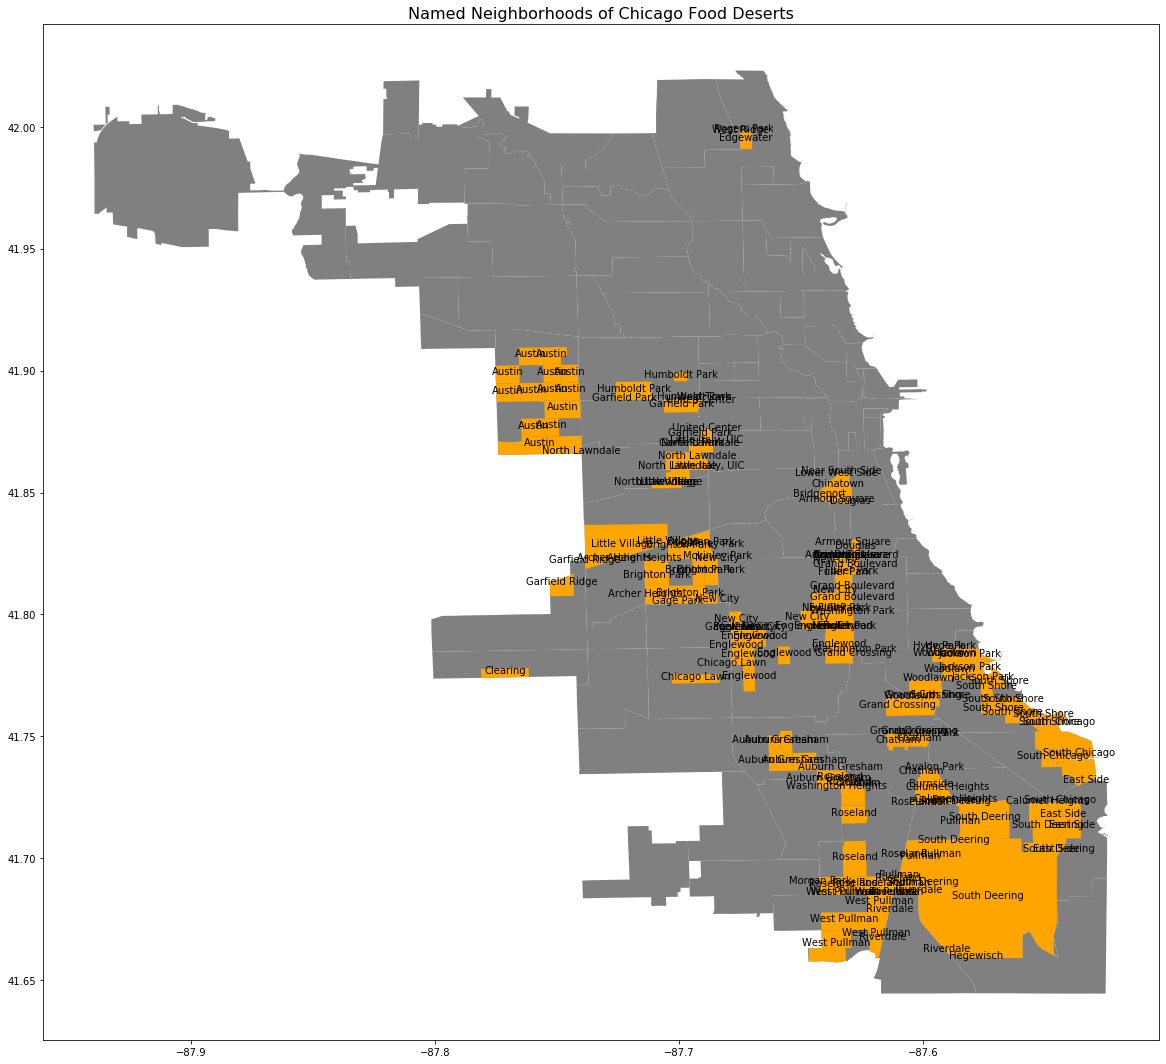

In [34]:
ax = neighbor_boundary.plot(figsize=(20,20), facecolor = 'grey')
neighborhoods_PPFD.plot(figsize=(20,20), facecolor='orange', ax=ax)
#neighborhoods_PPFD.plot()
for idx, row in neighborhoods_PPFD.iterrows():
    plt.annotate(s=row['pri_neigh'], xy=row['coords'],
                 horizontalalignment='center')
plt.title(label='Named Neighborhoods of Chicago Food Deserts', fontsize=16)

In [35]:
#neighborhoods_PPFD

In [36]:
#Step 1 group PPFD by Neighborhoods in new gdf
#https://stackoverflow.com/questions/40666126/how-to-group-by-one-column-and-sort-the-values-of-another-column
neighborhoods_PPFD_group =  neighborhoods_PPFD.groupby('pri_neigh').apply(lambda x:x.sort_values('PovertyRate'))

#step 2 keep columns that are potentially profitably for ALDI
neighborhoods_PPFD_group = neighborhoods_PPFD_group.filter(['pri_neigh','PovertyRate','centroid', 'geometry'], axis=1)
neighborhoods_PPFD_group.rename(columns= {'pri_neigh': 'neighborhood'}, inplace=True)
display(neighborhoods_PPFD_group.head())
print(type(neighborhoods_PPFD_group))
print(neighborhoods_PPFD_group.info())

neighborhood  PovertyRate                    centroid  \
pri_neigh                                                                     
Archer Heights 143  Archer Heights         23.7  POINT (-87.72643 41.82246)   
               142  Archer Heights         26.0  POINT (-87.71408 41.81471)   
               144  Archer Heights         32.1  POINT (-87.71384 41.80694)   
Armour Square  39    Armour Square         31.3  POINT (-87.62898 41.82833)   
               41    Armour Square         32.8  POINT (-87.63177 41.82364)   

                                                             geometry  
pri_neigh                                                              
Archer Heights 143  POLYGON ((-87.71437 41.82617, -87.71458 41.826...  
               142  MULTIPOLYGON (((-87.71388 41.80815, -87.71388 ...  
               144  POLYGON ((-87.71380 41.80618, -87.71385 41.806...  
Armour Square  39   MULTIPOLYGON (((-87.62895 41.82846, -87.62895 ...  
               41   MULTIPOLYGON (((-87.62987 41.82367, -87.62964 ...

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 188 entries, (Archer Heights, 143) to (Woodlawn, 50)
Data columns (total 4 columns):
neighborhood    188 non-null object
PovertyRate     188 non-null float64
centroid        188 non-null geometry
geometry        188 non-null geometry
dtypes: float64(1), geometry(2), object(1)
memory usage: 8.3+ KB
None


In [37]:
#step 3 calculate center of the food desert neighborhood census centroids
#using technique from: https://medium.com/@shakasom/how-to-convert-latitude-longtitude-columns-in-csv-to-geometry-column-using-python-4219d2106dea
from shapely.geometry import Point

neighborhoods_PPFD_group["centroid_x"] = neighborhoods_PPFD_group.centroid.y
neighborhoods_PPFD_group["centroid_y"] = neighborhoods_PPFD_group.centroid.x

neighborhood_PPFD_centroid_means = neighborhoods_PPFD_group.groupby('neighborhood').aggregate({'centroid_x' : 'mean', 'centroid_y' : 'mean'})

neighborhood_PPFD_centroid_means['geometry']   = [Point(xy) for xy in zip(neighborhood_PPFD_centroid_means['centroid_y'],
                                                                    neighborhood_PPFD_centroid_means['centroid_x'])]
neighborhood_PPFD_centroid_means_gdf = gpd.GeoDataFrame(neighborhood_PPFD_centroid_means)
print(neighborhood_PPFD_centroid_means_gdf.info())
display(neighborhood_PPFD_centroid_means_gdf)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 49 entries, Archer Heights to Woodlawn
Data columns (total 3 columns):
centroid_x    49 non-null float64
centroid_y    49 non-null float64
geometry      49 non-null geometry
dtypes: float64(2), geometry(1)
memory usage: 1.5+ KB
None


,centroid_x,centroid_y,geometry
neighborhood,,,
Archer Heights,41.814701,-87.718115,POINT (-87.71812 41.81470)
Armour Square,41.830570,-87.631086,POINT (-87.63109 41.83057)
Auburn Gresham,41.740487,-87.649572,POINT (-87.64957 41.74049)
Austin,41.890708,-87.755555,POINT (-87.75556 41.89071)
Avalon Park,41.743716,-87.596295,POINT (-87.59629 41.74372)
Bridgeport,41.836020,-87.638455,POINT (-87.63846 41.83602)
Brighton Park,41.818758,-87.696078,POINT (-87.69608 41.81876)
Burnside,41.725659,-87.591902,POINT (-87.59190 41.72566)
Calumet Heights,41.725336,-87.574111,POINT (-87.57411 41.72534)


In [38]:
# Now we have the mean of the centroids of the census neighborhood food deserts

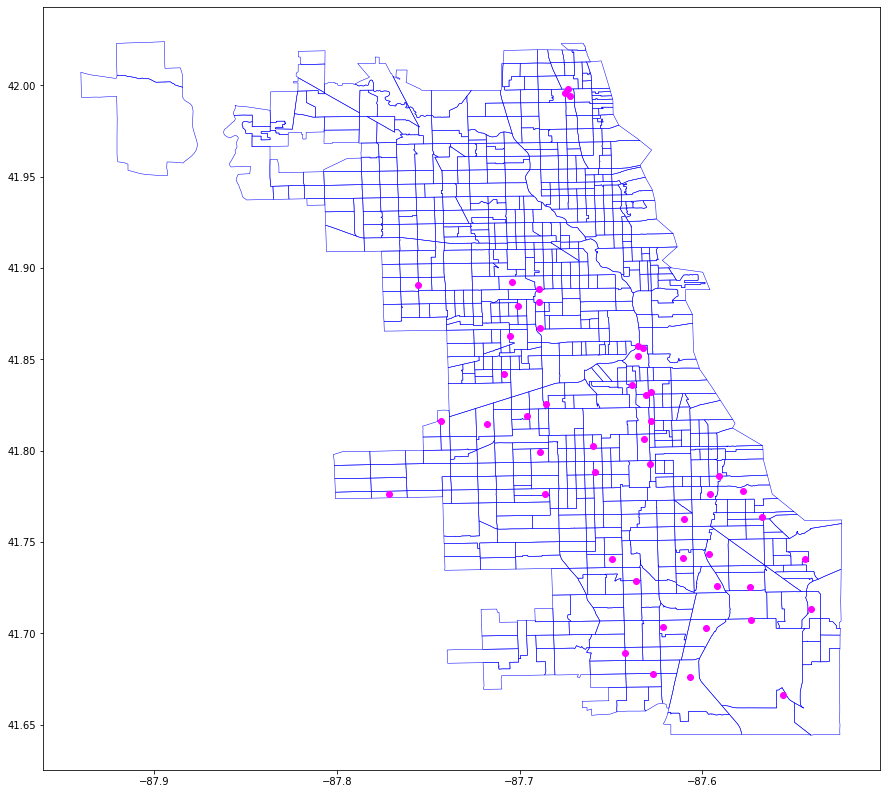

In [39]:
plot4 = Chicago_census_tract.plot(figsize=(15,15), edgecolor='blue', facecolor="None",  linewidth =.5 )
plot1 = neighborhood_PPFD_centroid_means_gdf.plot(figsize=(15,15), color='magenta', ax = plot4)

#### Now lets find the ALDI, that are within 800 meters (1/2  mile) from centroid of a food desert neigborhood.
We will see that there are 33 ALDIs in Chicago proper. However, by observation we can see that there are about 10 that are either 
close to or in a food desert where the household  income is between 26000 and 44000. 
These specific food deserts are represented by the orange areas in this map. Later the green dots represent the ALDIs 
1. We get the centroid of census tract  in the PPFD
2. We get the centroid of the neighborhoods containing the censustract
3. We get the unique neighborhoods
4. We get the distance from the ALDIs to the centroid of the unique neighborhood


In [40]:
#Here we have hand collected the ALDI store locations in Chicago and then coded them in to  excel
neighbor_ALDI2 = pd.read_csv(r'C:\Users\Henry\OneDrive\DataScience\DataScienceCapstone\Chicago_ALDI_geocodes2.csv')

In [41]:
neighbor_ALDI2.head()

,StoreName,Address,City,State,Country,ZIP,Latitude,Longitude
0,ALDI,1739 W Cermak Rd,Chicago,IL,USA,60608,41.851661,-87.670216
1,ALDI,1753 N Milwaukee Ave,Chicago,IL,USA,60609,41.913324,-87.681777
2,ALDI,1836 N Clybourn Ave,Chicago,IL,USA,60610,41.914397,-87.654833
3,ALDI,1508 W 47th St,Chicago,IL,USA,60611,41.809446,-87.662814
4,ALDI,8500 S Holland Rd,Chicago,IL,USA,60612,41.739332,-87.632404


In [42]:
# convert to a GDF
neighbor_ALDI2_gdf = gpd.GeoDataFrame(neighbor_ALDI2, geometry=gpd.points_from_xy
                                           (neighbor_ALDI2.Longitude, neighbor_ALDI2.Latitude))

In [43]:
print(neighbor_ALDI2_gdf.head())
type(neighbor_ALDI2_gdf)
neighbor_ALDI2_gdf.info()

  StoreName               Address     City State Country    ZIP   Latitude  \
0      ALDI      1739 W Cermak Rd  Chicago    IL     USA  60608  41.851661   
1      ALDI  1753 N Milwaukee Ave  Chicago    IL     USA  60609  41.913324   
2      ALDI   1836 N Clybourn Ave  Chicago    IL     USA  60610  41.914397   
3      ALDI        1508 W 47th St  Chicago    IL     USA  60611  41.809446   
4      ALDI     8500 S Holland Rd  Chicago    IL     USA  60612  41.739332   

   Longitude                    geometry  
0 -87.670216  POINT (-87.67022 41.85166)  
1 -87.681777  POINT (-87.68178 41.91332)  
2 -87.654833  POINT (-87.65483 41.91440)  
3 -87.662814  POINT (-87.66281 41.80945)  
4 -87.632404  POINT (-87.63240 41.73933)  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
StoreName    34 non-null object
Address      34 non-null object
City         34 non-null object
State        34 non-null object
Country      34 non-null object
ZIP

#### In the map below we can see that there are 33 ALDI's in Chicago proper represented by the mageta dots. However, by observation there are 8 that are either close to or in a food desert with a household  income between 26000 and 44000. These specific food deserts are represented by the blue areas in this map. 

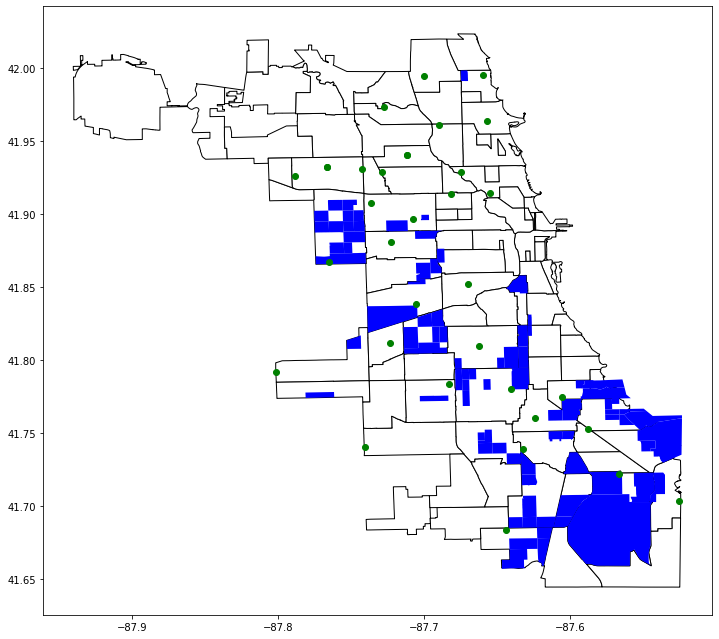

In [44]:
#plot ALDI's over a neighhood and add the food deserts of 2015

ax = neighbor_boundary.plot(figsize=(12,12), color = 'white', edgecolor='black')
bx = LILA_gdf.plot(color = 'blue', ax=ax)
neighbor_ALDI2_gdf.plot(ax=bx, color='green' )


#### Let's now introduce the centroids of the food desert censustracts for a complete picture

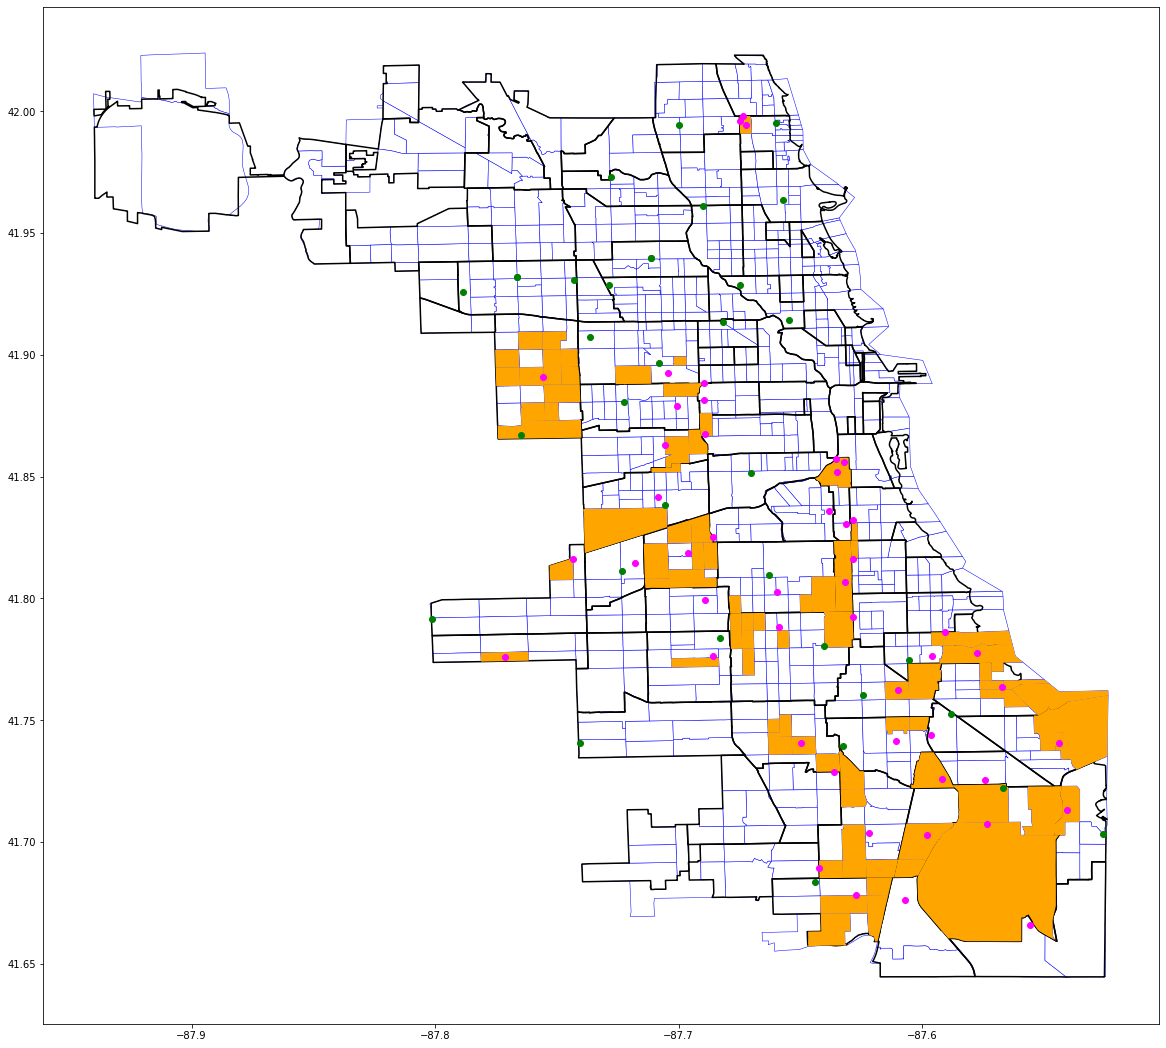

In [45]:
plot4 = Chicago_census_tract.plot(figsize=(20,20), edgecolor='blue', facecolor = 'white', linewidth =.5)
plot3 = neighbor_boundary.plot(figsize=(20,20), edgecolor = 'black', facecolor='None',  ax= plot4, linewidth=1.5)

plot2 = LILA_gdf.plot(figsize=(20,20), facecolor = 'orange', ax=plot3) # Neighborhoods with food deserts
plot1 = neighborhood_PPFD_centroid_means_gdf.plot(figsize=(20,20), color='magenta', ax=plot2)
neighbor_ALDI2_gdf.plot(color='green' , ax=plot1)
#fig = plt.figure()

In [46]:
# Calulate distance between latitude and longitude
# https://stackoverflow.com/questions/44446862/calculate-distance-between-latitude-and-longitude-in-dataframe

In [47]:
neighbor_ALDI2_gdf['Address']

0             1739 W Cermak Rd
1         1753 N Milwaukee Ave
2          1836 N Clybourn Ave
3               1508 W 47th St
4            8500 S Holland Rd
5           3320 W Belmont Ave
6     7800 S South Chicago Ave
7     6621 S Cottage Grove Ave
8             800 N Kedzie Ave
9         6520 W Fullerton Ave
10           4501 S Pulaski Rd
11           5001 N Pulaski Rd
12             4500 N Broadway
13          2828 N Central Ave
14              821 W 115th St
15          6025 S Western Ave
16           3030 S Kedzie Ave
17         4645 W Diversey Ave
18           3835 W Madison St
19             6221 N Broadway
20           8333 S Cicero Ave
21              2333 E 95th St
22           5501 S Harlem Ave
23    10532 S Indianapolis Ave
24          5629 W Fillmore St
25       4030 W Wrightwood Ave
26      620 W 63rd St, Chicago
27          1440 N Kostner Ave
28       6220 N California Ave
29         2431 W Montrose Ave
30          2828 N Central Ave
31         2600 N Clybourn Ave
32      

In [48]:
#assign Seattle, a far away point, to use as closest ALDI default to be overridden by ALDI addresses in Chicago
neighborhood_PPFD_centroid_means_gdf['Closest_ALDI'] = Point(47.6062, -122.3321)
neighborhood_PPFD_centroid_means_gdf['Distant_to_ALDI'] = 2500.1
neighborhood_PPFD_centroid_means_gdf['Address_of_Nearest_ALDI'] = neighbor_ALDI2_gdf['Address']
neighborhood_PPFD_centroid_means_gdf['Latitude_of_Nearest_ALDI'] = neighbor_ALDI2_gdf['Latitude'] 
neighborhood_PPFD_centroid_means_gdf['Longitude_of_Nearest_ALDI'] = neighbor_ALDI2_gdf['Longitude'] 
neighborhood_PPFD_centroid_means_gdf.head()

,centroid_x,centroid_y,geometry,Closest_ALDI,Distant_to_ALDI,Address_of_Nearest_ALDI,Latitude_of_Nearest_ALDI,Longitude_of_Nearest_ALDI
neighborhood,,,,,,,,
Archer Heights,41.814701,-87.718115,POINT (-87.71812 41.81470),POINT (47.6062 -122.3321),2500.1,NaN,NaN,NaN
Armour Square,41.830570,-87.631086,POINT (-87.63109 41.83057),POINT (47.6062 -122.3321),2500.1,NaN,NaN,NaN
Auburn Gresham,41.740487,-87.649572,POINT (-87.64957 41.74049),POINT (47.6062 -122.3321),2500.1,NaN,NaN,NaN
Austin,41.890708,-87.755555,POINT (-87.75556 41.89071),POINT (47.6062 -122.3321),2500.1,NaN,NaN,NaN
Avalon Park,41.743716,-87.596295,POINT (-87.59629 41.74372),POINT (47.6062 -122.3321),2500.1,NaN,NaN,NaN


In [49]:
#shows there are 15 neighborhoods that have no ALDI Assuming there are not 2 ADLI's or more in any neighborhood
print(neighborhood_PPFD_centroid_means_gdf.info())
print(neighbor_ALDI2_gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 49 entries, Archer Heights to Woodlawn
Data columns (total 8 columns):
centroid_x                   49 non-null float64
centroid_y                   49 non-null float64
geometry                     49 non-null geometry
Closest_ALDI                 49 non-null object
Distant_to_ALDI              49 non-null float64
Address_of_Nearest_ALDI      0 non-null object
Latitude_of_Nearest_ALDI     0 non-null float64
Longitude_of_Nearest_ALDI    0 non-null float64
dtypes: float64(5), geometry(1), object(2)
memory usage: 3.4+ KB
None
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
StoreName    34 non-null object
Address      34 non-null object
City         34 non-null object
State        34 non-null object
Country      34 non-null object
ZIP          34 non-null int64
Latitude     34 non-null float64
Longitude    34 non-null float64
geometry     34 non-null geometry
dtypes: float64(2

In [50]:
#lets find the closest ALDI
from geopy.distance import distance
from geopy.distance import geodesic 
import geopandas as gp
# https://www.programcreek.com/python/example/96854/geopy.distance.distance   no.10
for center, coord in neighborhood_PPFD_centroid_means_gdf.iterrows():
    neighlat = neighborhood_PPFD_centroid_means_gdf.centroid_x[center]
    neighlon = neighborhood_PPFD_centroid_means_gdf.centroid_y[center]

    for dist, aldi in neighbor_ALDI2_gdf.iterrows():
        distlat = neighbor_ALDI2_gdf.Latitude[dist]
        distlon = neighbor_ALDI2_gdf.Longitude[dist]      
        dist_to_ALDI = distance((neighlat,neighlon),(distlat,distlon)).miles
        
        if dist_to_ALDI < neighborhood_PPFD_centroid_means_gdf.Distant_to_ALDI[center]:
            neighborhood_PPFD_centroid_means_gdf.Distant_to_ALDI.loc[center] = dist_to_ALDI
            neighborhood_PPFD_centroid_means_gdf.Address_of_Nearest_ALDI.loc[center] = neighbor_ALDI2_gdf.Address[dist]
            neighborhood_PPFD_centroid_means_gdf.Latitude_of_Nearest_ALDI.loc[center] = neighbor_ALDI2_gdf.Latitude[dist]
            neighborhood_PPFD_centroid_means_gdf.Longitude_of_Nearest_ALDI.loc[center] = neighbor_ALDI2_gdf.Longitude[dist]
            neighborhood_PPFD_centroid_means_gdf.Closest_ALDI.loc[center] = neighbor_ALDI2_gdf.geometry[dist]
                        
print(neighborhood_PPFD_centroid_means_gdf.head(8))
neighborhood_PPFD_centroid_means_gdf.info()   

C:\Users\Henry\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                centroid_x  centroid_y                    geometry  \
neighborhood                                                         
Archer Heights   41.814701  -87.718115  POINT (-87.71812 41.81470)   
Armour Square    41.830570  -87.631086  POINT (-87.63109 41.83057)   
Auburn Gresham   41.740487  -87.649572  POINT (-87.64957 41.74049)   
Austin           41.890708  -87.755555  POINT (-87.75556 41.89071)   
Avalon Park      41.743716  -87.596295  POINT (-87.59629 41.74372)   
Bridgeport       41.836020  -87.638455  POINT (-87.63846 41.83602)   
Brighton Park    41.818758  -87.696078  POINT (-87.69608 41.81876)   
Burnside         41.725659  -87.591902  POINT (-87.59190 41.72566)   

                                        Closest_ALDI  Distant_to_ALDI  \
neighborhood                                                            
Archer Heights  POINT (-87.72335099999999 41.811266)         0.359569   
Armour Square           POINT (-87.662814 41.809446)         2.192795   
Auburn 

In [51]:
# Now want to  a) find the food deserts that are within 1/2 mile of food desert neighborhood centroid
#              b) find the customer satisfaction with those ALDIs
#              c) Then Find the neighborhoods in food deserts that might be good candidtates for a new ALDI's 

#THere are 91 neighborhoods in CHicago. 49 have food deserts. 41 have no food chain in the neighborhood as of the 
# 2010 census. currently ALDI has opened 8 stores in the former food desert. Later we will see the satisfaction with those ALDI's 

In [52]:
# a) find the food deserts that are within 1/2 mile of food desert neighborhood centroid
ALDI_within_half_mile = neighborhood_PPFD_centroid_means_gdf[neighborhood_PPFD_centroid_means_gdf['Distant_to_ALDI'] <= .55]
print(ALDI_within_half_mile)
ALDI_within_half_mile.info()

                 centroid_x  centroid_y                    geometry  \
neighborhood                                                          
Archer Heights    41.814701  -87.718115  POINT (-87.71812 41.81470)   
Calumet Heights   41.725336  -87.574111  POINT (-87.57411 41.72534)   
Chicago Lawn      41.776448  -87.685877  POINT (-87.68588 41.77645)   
Humboldt Park     41.892479  -87.704455  POINT (-87.70446 41.89248)   
Little Village    41.841808  -87.708623  POINT (-87.70862 41.84181)   
Morgan Park       41.689256  -87.642282  POINT (-87.64228 41.68926)   
New City          41.802542  -87.659590  POINT (-87.65959 41.80254)   
Woodlawn          41.776274  -87.595886  POINT (-87.59589 41.77627)   

                                         Closest_ALDI  Distant_to_ALDI  \
neighborhood                                                             
Archer Heights   POINT (-87.72335099999999 41.811266)         0.359569   
Calumet Heights          POINT (-87.566698 41.722142)         0.442

In [53]:
for center, coord in neighborhood_PPFD_centroid_means_gdf.iterrows():
    neighlat = neighborhood_PPFD_centroid_means_gdf.centroid_x[center]
    print(coord)
for index, row in ALDI_within_half_mile.iterrows():

    lat = ALDI_within_half_mile.centroid_x[index]
    print(row)

centroid_x                                                        41.8147
centroid_y                                                       -87.7181
geometry                     POINT (-87.71811534545098 41.81470139767541)
Closest_ALDI                         POINT (-87.72335099999999 41.811266)
Distant_to_ALDI                                                  0.359569
Address_of_Nearest_ALDI                                 4501 S Pulaski Rd
Latitude_of_Nearest_ALDI                                          41.8113
Longitude_of_Nearest_ALDI                                        -87.7234
Name: Archer Heights, dtype: object
centroid_x                                                       41.8306
centroid_y                                                      -87.6311
geometry                     POINT (-87.63108610536133 41.8305696970898)
Closest_ALDI                                POINT (-87.662814 41.809446)
Distant_to_ALDI                                                  2.19279
Address

In [54]:
#ALDIs that greater than a 1/2 mile from a food desert neighborhood

ALDI_greater_half_mile = neighborhood_PPFD_centroid_means_gdf[neighborhood_PPFD_centroid_means_gdf['Distant_to_ALDI'] > .551]
ALDI_greater_half_mile

,centroid_x,centroid_y,geometry,Closest_ALDI,Distant_to_ALDI,Address_of_Nearest_ALDI,Latitude_of_Nearest_ALDI,Longitude_of_Nearest_ALDI
neighborhood,,,,,,,,
Armour Square,41.830570,-87.631086,POINT (-87.63109 41.83057),POINT (-87.662814 41.809446),2.192795,1508 W 47th St,41.809446,-87.662814
Auburn Gresham,41.740487,-87.649572,POINT (-87.64957 41.74049),POINT (-87.63240400000001 41.739332),0.890974,8500 S Holland Rd,41.739332,-87.632404
Austin,41.890708,-87.755555,POINT (-87.75556 41.89071),POINT (-87.736576 41.907261),1.504289,1440 N Kostner Ave,41.907261,-87.736576
Avalon Park,41.743716,-87.596295,POINT (-87.59629 41.74372),POINT (-87.58796700000001 41.752635),0.751100,7800 S South Chicago Ave,41.752635,-87.587967
Bridgeport,41.836020,-87.638455,POINT (-87.63846 41.83602),POINT (-87.670216 41.851661),1.962620,1739 W Cermak Rd,41.851661,-87.670216
Brighton Park,41.818758,-87.696078,POINT (-87.69608 41.81876),POINT (-87.70563800000001 41.838249),1.432848,3030 S Kedzie Ave,41.838249,-87.705638
Burnside,41.725659,-87.591902,POINT (-87.59190 41.72566),POINT (-87.566698 41.722142),1.325548,2333 E 95th St,41.722142,-87.566698
Chatham,41.741409,-87.610625,POINT (-87.61063 41.74141),POINT (-87.63240400000001 41.739332),1.134819,8500 S Holland Rd,41.739332,-87.632404
Chinatown,41.851723,-87.635158,POINT (-87.63516 41.85172),POINT (-87.670216 41.851661),1.809018,1739 W Cermak Rd,41.851661,-87.670216


In [55]:
# libraries for displaying images
from IPython.display import Image 
#from IPython.core.display import HTML 
from IPython.display import HTML
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import requests # library to handle requests

print('Folium installed')
print('Libraries imported.')
print('requests imported')

Folium installed
Libraries imported.
requests imported


In [79]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [57]:
# Let us test one ALDI' that is in Chicago Archer Heights
#POINT (-87.72335099999999 41.811266)
latitude =41.8112662
longitude = -87.72335099999999
print(latitude, longitude)

41.8112662 -87.723351


In [58]:
# How satisfied are those that live in Archer heights with ALDI
search_query = 'ALDI'
radius = 150 #need a radius of 150 meters to capture ALDI
print(search_query + ' .... OK!')   

ALDI .... OK!


In [59]:
#search_query  = "ALDI"

urls = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [60]:
import requests # library to handle requests
results = requests.get(url=urls).json()
print(results)
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

{'meta': {'code': 200, 'requestId': '5e36dbabc8cff2001b1046ec'}, 'response': {'venues': [{'id': '4c75a2e83adda1436ef707af', 'name': 'Aldi', 'location': {'address': '4501 S Pulaski Rd', 'crossStreet': 'at W 45th St', 'lat': 41.81006434914671, 'lng': -87.7232710220232, 'labeledLatLngs': [{'label': 'display', 'lat': 41.81006434914671, 'lng': -87.7232710220232}], 'distance': 133, 'postalCode': '60632', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['4501 S Pulaski Rd (at W 45th St)', 'Chicago, IL 60632', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d118951735', 'name': 'Grocery Store', 'pluralName': 'Grocery Stores', 'shortName': 'Grocery Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1580653491', 'hasPerk': False}]}}


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4c75a2e83adda1436ef707af,Aldi,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1580653491,False,4501 S Pulaski Rd,at W 45th St,41.810064,-87.723271,"[{'label': 'display', 'lat': 41.81006434914671...",133,60632,US,Chicago,IL,United States,"[4501 S Pulaski Rd (at W 45th St), Chicago, IL..."


In [61]:

def getVenueIDs(ID, SEC, GDF, VER, sq, rad, LIM ) :
    
    url_list = []
    dataframe = pd.DataFrame([])
    venuelist= pd.DataFrame([])
    for index, row in GDF.iterrows():
        lat =  GDF.Latitude_of_Nearest_ALDI[index]
        
        long = GDF.Longitude_of_Nearest_ALDI[index]
        #print(lat, long)
       
        venue_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(ID, SEC, lat, long, VER, sq, rad, LIM)
        url_list.append(venue_url)
        
    for link in url_list:
        result = requests.get(link).json()
        #print(results)
        venuelist = result['response']['venues']

        if dataframe.empty:
            dataframe = json_normalize(venuelist)
        else:
            dataframe = pd.concat([dataframe, json_normalize(venuelist)], axis=0, sort=False, ignore_index=True )

    return(dataframe)    

In [62]:

CLIENT_ID = 'FTKW4QUZJK1RDVHEZMNAZZ34TMX4LSJCHUEDOD3LEFGXKPWS' # your Foursquare ID
CLIENT_SECRET = 'ROIL4V1RYNZABWRVREO3MVNU3P4MWEWQ1C5AHK132XGPRQLY' # your Foursquare Secret
VERSION = '20180604'
radius = 150
search_query = 'ALDI'
limit = 100

ALDI_FOURSQUARE=getVenueIDs(CLIENT_ID, CLIENT_SECRET, ALDI_within_half_mile, VERSION, search_query, radius, limit)
ALDI_FOURSQUARE


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4c75a2e83adda1436ef707af,Aldi,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1580653491,False,4501 S Pulaski Rd,at W 45th St,41.810064,-87.723271,"[{'label': 'display', 'lat': 41.81006434914671...",133,60632,US,Chicago,IL,United States,"[4501 S Pulaski Rd (at W 45th St), Chicago, IL..."
1,4e03c73b52b1ec898638c1b6,ALDI,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1580653491,False,2333 E 95th St,NaN,41.722201,-87.566719,"[{'label': 'display', 'lat': 41.72220080122101...",6,60617,US,Chicago,IL,United States,"[2333 E 95th St, Chicago, IL 60617, United Sta..."
2,4df638b8b0fb807158cb1a65,ALDI,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",v-1580653491,False,6025 S Western Ave,NaN,41.783808,-87.682989,"[{'label': 'display', 'lat': 41.78380814352486...",4,60636,US,Chicago,IL,United States,"[6025 S Western Ave, Chicago, IL 60636, United..."
3,4c596813f346c92810684cca,ALDI,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1580653492,False,800 N Kedzie Ave,W Chicago Ave,41.896717,-87.708188,"[{'label': 'display', 'lat': 41.8967171, 'lng'...",24,60651,US,Chicago,IL,United States,"[800 N Kedzie Ave (W Chicago Ave), Chicago, IL..."
4,4dbf2a3cfa8cc78a860bb678,ALDI,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",v-1580653492,False,3030 S Kedzie Ave,NaN,41.838257,-87.705649,"[{'label': 'display', 'lat': 41.83825668140584...",1,60623,US,Chicago,IL,United States,"[3030 S Kedzie Ave, Chicago, IL 60623, United ..."
5,4e1f8fa5e4cdf68591723866,ALDI,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1580653492,False,821 W 115th St,NaN,41.684795,-87.643309,"[{'label': 'display', 'lat': 41.684795, 'lng':...",139,60643,US,Chicago,IL,United States,"[821 W 115th St, Chicago, IL 60643, United Sta..."
6,4bae4dddf964a5200ea03be3,ALDI,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1580653492,False,1508 W 47th St,NaN,41.809380,-87.662865,"[{'label': 'display', 'lat': 41.80938032091968...",8,60609,US,Chicago,IL,United States,"[1508 W 47th St, Chicago, IL 60609, United Sta..."
7,4c8967171eafb1f7b0407135,ALDI,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1580653492,False,6621 S Cottage Grove Ave,NaN,41.774518,-87.605391,"[{'label': 'display', 'lat': 41.77451826862105...",6,60637,US,Chicago,IL,United States,"[6621 S Cottage Grove Ave, Chicago, IL 60637, ..."


In [63]:
ALDI_FOURSQUARE["location.formattedAddress"]

0    [4501 S Pulaski Rd (at W 45th St), Chicago, IL...
1    [2333 E 95th St, Chicago, IL 60617, United Sta...
2    [6025 S Western Ave, Chicago, IL 60636, United...
3    [800 N Kedzie Ave (W Chicago Ave), Chicago, IL...
4    [3030 S Kedzie Ave, Chicago, IL 60623, United ...
5    [821 W 115th St, Chicago, IL 60643, United Sta...
6    [1508 W 47th St, Chicago, IL 60609, United Sta...
7    [6621 S Cottage Grove Ave, Chicago, IL 60637, ...
Name: location.formattedAddress, dtype: object

In [64]:
limit = 1
ALDI_ID = '4c75a2e83adda1436ef707af'

tiptest_url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(ALDI_ID, CLIENT_ID, CLIENT_SECRET,VERSION,limit)
tiptest_url

'https://api.foursquare.com/v2/venues/4c75a2e83adda1436ef707af/tips?client_id=FTKW4QUZJK1RDVHEZMNAZZ34TMX4LSJCHUEDOD3LEFGXKPWS&client_secret=ROIL4V1RYNZABWRVREO3MVNU3P4MWEWQ1C5AHK132XGPRQLY&v=20180604&limit=1'

In [65]:
results = requests.get(tiptest_url).json()
results

{'meta': {'code': 200, 'requestId': '5e36db37882fc7001b49310b'},
 'response': {'tips': {'count': 3,
   'items': [{'id': '522768e511d22c027d83d38e',
     'createdAt': 1378314469,
     'text': 'Watch your cart when you leave - lots of people are trying to steal it foe the quarter.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/522768e511d22c027d83d38e',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 0,
     'disagreeCount': 0,
     'todo': {'count': 0},
     'user': {'id': '18654698',
      'firstName': 'Kevin',
      'lastName': 'F',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/ADQ3UWARFT5KWETS.jpg'}}}]}}}

In [66]:
# https://stackoverflow.com/questions/23330654/update-a-dataframe-in-pandas-while-iterating-row-by-row  
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html
#https://stackoverflow.com/questions/56031316/how-to-make-a-loop-with-multiple-foursquare-queries-and-add-every-new-query-to-a

def getVenueTips(ID, SEC, GDF, VER, sq, rad, LIM ) :
    
    tip_url_list = []
    tipframe = pd.DataFrame([])
    tips_df= pd.DataFrame([])
    for indx, row in GDF.iterrows():
        ALDI_ID  =  GDF.id[indx]
        
        lat =  GDF['location.lat'][indx]       
        long = GDF['location.lng'][indx]

        print(ALDI_ID, lat, long)
       
        #tip_url = 'https://api.foursquare.com/v2/venues/{}/tips/?client_id={}&client_secret={}&v={}&limit={}&ll={},{}'.format(ALDI_ID, ID, SEC,VER, LIM, lat,long)
        tip_url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(ALDI_ID, ID, SEC,VER, LIM)
        #tip_url_list.append(tip_url)
        
    #for tip in tip_url_list:
        results = requests.get(tip_url).json()
        print(results)
        
        tipframe = results['response']['tips']['items']

        if tips_df.empty:
            tips_df = json_normalize(tipframe)
            tips_df.at[indx, "location.lat"] = GDF["location.lat"][indx]
            tips_df.at[indx, "location.lng"] = GDF["location.lng"][indx]
            tips_df.at[indx, "name"]         = GDF["name"][indx]
            #tips_df.at[indx, ["location.formattedAddress"]]      = GDF["location.formattedAddress"][indx]
        else:
            tips_df = pd.concat([tips_df, json_normalize(tipframe)], axis=0, sort=False, ignore_index=True )
            tips_df.at[indx, "location.lat"] = GDF["location.lat"][indx]
            tips_df.at[indx, "location.lng"] = GDF["location.lng"][indx]
            tips_df.at[indx, "name"]         = GDF["name"][indx]
            #tips_df.at[indx, ["location.formattedAddress"]]      = GDF["location.formattedAddress"][indx]
    #display(tips_df)
    tips_df["location.lat"] = GDF["location.lat"]
    tips_df["location.lng"] = GDF["location.lng"]
    tips_df["location.formattedAddress"] =GDF["location.formattedAddress"]
    return(tips_df)


In [67]:
pd.set_option('display.max_colwidth', -1)
ALDI_TIPS=getVenueTips(CLIENT_ID, CLIENT_SECRET, ALDI_FOURSQUARE, VERSION, search_query, radius, limit )
ALDI_TIPS


4c75a2e83adda1436ef707af 41.81006434914671 -87.7232710220232
{'meta': {'code': 200, 'requestId': '5e36db37882fc7001b4931e9'}, 'response': {'tips': {'count': 3, 'items': [{'id': '522768e511d22c027d83d38e', 'createdAt': 1378314469, 'text': 'Watch your cart when you leave - lots of people are trying to steal it foe the quarter.', 'type': 'user', 'canonicalUrl': 'https://foursquare.com/item/522768e511d22c027d83d38e', 'lang': 'en', 'likes': {'count': 0, 'groups': []}, 'logView': True, 'agreeCount': 0, 'disagreeCount': 0, 'todo': {'count': 0}, 'user': {'id': '18654698', 'firstName': 'Kevin', 'lastName': 'F', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/ADQ3UWARFT5KWETS.jpg'}}}]}}}
4e03c73b52b1ec898638c1b6 41.72220080122101 -87.56671864284272
{'meta': {'code': 200, 'requestId': '5e36db29211536001bfa4899'}, 'response': {'tips': {'count': 1, 'items': [{'id': '4f692942e4b08bde16b9a990', 'createdAt': 1332291906, 'text': 'People hate to be asked where they are, but they wil

,id,createdAt,text,type,canonicalUrl,lang,logView,agreeCount,disagreeCount,likes.count,...,user.photo.prefix,user.photo.suffix,location.lat,location.lng,name,likes.summary,authorInteractionType,lastVoteText,lastUpvoteTimestamp,location.formattedAddress
0,522768e511d22c027d83d38e,1.378314e+09,Watch your cart when you leave - lots of people are trying to steal it foe the quarter.,user,https://foursquare.com/item/522768e511d22c027d83d38e,en,True,0.0,0.0,0.0,...,https://fastly.4sqi.net/img/user/,/ADQ3UWARFT5KWETS.jpg,41.810064,-87.723271,Aldi,NaN,NaN,NaN,NaN,"[4501 S Pulaski Rd (at W 45th St), Chicago, IL 60632, United States]"
1,4f692942e4b08bde16b9a990,1.332292e+09,"People hate to be asked where they are, but they will just expose were they are to everyone with no problem. This is crazy! Lol",user,https://foursquare.com/item/4f692942e4b08bde16b9a990,en,True,1.0,0.0,0.0,...,https://fastly.4sqi.net/img/user/,/C0H0KG2OLVXVCKBR.jpg,41.722201,-87.566719,ALDI,NaN,NaN,NaN,NaN,"[2333 E 95th St, Chicago, IL 60617, United States]"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41.783808,-87.682989,ALDI,NaN,NaN,NaN,NaN,"[6025 S Western Ave, Chicago, IL 60636, United States]"
3,511f1bffe4b06730a42703ce,1.360993e+09,They will have what you need but you'll have to try some things to find what you like. I've been shopping at Aldi for years and I feel some of their food is tastier than their name brand counterparts,user,https://foursquare.com/item/511f1bffe4b06730a42703ce,en,True,1.0,0.0,0.0,...,https://fastly.4sqi.net/img/user/,/FNSI1QL4VZCTJKC0.jpg,41.896717,-87.708188,ALDI,NaN,NaN,NaN,NaN,"[800 N Kedzie Ave (W Chicago Ave), Chicago, IL 60651, United States]"
4,5124edc5e4b05a081c89c125,1.361375e+09,Don't forget your tortillas el MiLAGRO....deliver everyday ....,user,https://foursquare.com/item/5124edc5e4b05a081c89c125,en,True,2.0,0.0,1.0,...,https://fastly.4sqi.net/img/user/,/4708527-4MHM2ZOUPTRDRDDL.jpg,41.838257,-87.705649,ALDI,1 like,NaN,NaN,NaN,"[3030 S Kedzie Ave, Chicago, IL 60623, United States]"
5,561ae1a2498ee7cbca81e48f,1.444602e+09,Saw a rat 🐀 in this bad boy. Will never patronize this Aldi's again‼️,user,https://foursquare.com/item/561ae1a2498ee7cbca81e48f,en,True,2.0,0.0,0.0,...,https://fastly.4sqi.net/img/user/,/6232061-YJ2TPHTSJ5A0RJIM.jpg,41.684795,-87.643309,ALDI,NaN,disliked,NaN,NaN,"[821 W 115th St, Chicago, IL 60643, United States]"
6,5467b436498e8d2bf4b3ca78,1.416082e+09,"The groceries are not only cheap but of good quality. They even have organic, reduced sugar & low fat items!",user,https://foursquare.com/item/5467b436498e8d2bf4b3ca78,en,True,1.0,0.0,0.0,...,https://fastly.4sqi.net/img/user/,/94938208-MHVXGB3QUAYPKBVW.jpg,41.809380,-87.662865,ALDI,NaN,liked,NaN,NaN,"[1508 W 47th St, Chicago, IL 60609, United States]"
7,51747000e4b0bb0570bbaf42,1.366585e+09,Remember you bags,user,https://foursquare.com/item/51747000e4b0bb0570bbaf42,en,True,5.0,0.0,2.0,...,https://fastly.4sqi.net/img/user/,/QNEC5I3Y4HECBPGJ.jpg,41.774518,-87.605391,ALDI,2 likes,meh,"Upvoted Nov 30, 2019",1.575131e+09,"[6621 S Cottage Grove Ave, Chicago, IL 60637, United States]"


In [68]:
ALDI_TIPS3 = ALDI_TIPS[['text','location.lat', 'location.lng', 'name', 'location.formattedAddress' ]].copy()
ALDI_TIPS3

,text,location.lat,location.lng,name,location.formattedAddress
0,Watch your cart when you leave - lots of people are trying to steal it foe the quarter.,41.810064,-87.723271,Aldi,"[4501 S Pulaski Rd (at W 45th St), Chicago, IL 60632, United States]"
1,"People hate to be asked where they are, but they will just expose were they are to everyone with no problem. This is crazy! Lol",41.722201,-87.566719,ALDI,"[2333 E 95th St, Chicago, IL 60617, United States]"
2,NaN,41.783808,-87.682989,ALDI,"[6025 S Western Ave, Chicago, IL 60636, United States]"
3,They will have what you need but you'll have to try some things to find what you like. I've been shopping at Aldi for years and I feel some of their food is tastier than their name brand counterparts,41.896717,-87.708188,ALDI,"[800 N Kedzie Ave (W Chicago Ave), Chicago, IL 60651, United States]"
4,Don't forget your tortillas el MiLAGRO....deliver everyday ....,41.838257,-87.705649,ALDI,"[3030 S Kedzie Ave, Chicago, IL 60623, United States]"
5,Saw a rat 🐀 in this bad boy. Will never patronize this Aldi's again‼️,41.684795,-87.643309,ALDI,"[821 W 115th St, Chicago, IL 60643, United States]"
6,"The groceries are not only cheap but of good quality. They even have organic, reduced sugar & low fat items!",41.809380,-87.662865,ALDI,"[1508 W 47th St, Chicago, IL 60609, United States]"
7,Remember you bags,41.774518,-87.605391,ALDI,"[6621 S Cottage Grove Ave, Chicago, IL 60637, United States]"


In [69]:

locations = ALDI_TIPS3[['location.lat', 'location.lng']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]
print(locationlist)

[[41.81006434914671, -87.7232710220232], [41.72220080122101, -87.56671864284272], [41.78380814352486, -87.68298916900335], [41.8967171, -87.7081878], [41.838256681405845, -87.70564913749695], [41.684795, -87.643309], [41.80938032091968, -87.66286522150045], [41.77451826862105, -87.60539084672928]]


In [70]:
print(type(Chicago_shape.total_bounds))
Chicago_shape.total_bounds

<class 'numpy.ndarray'>


array([-87.94011408,  41.64454312, -87.5241371 ,  42.02303859])

In [71]:
pts=Chicago_shape.total_bounds
print(pts)

[-87.94011408  41.64454312 -87.5241371   42.02303859]


In [72]:
#reverse geocodes for folium 

sw = pts[1::-1]
ne = pts[3:1:-1]

print(sw,ne)

[ 41.64454312 -87.94011408] [ 42.02303859 -87.5241371 ]


In [73]:
#Chicago_map.fit_bounds([ [sw] , [ne]]) 
f= folium.Figure(width = 1000,height = 1400 )

# latitude 41.8818 changed to 41.8418 to capture southern end of Chicago? 
# Centroid POINT (-87.68665 41.83772) Chicago_shape.centroid
Chicago_map = folium.Map(location=[41.841832, -87.623177],  
                         min_zoom=12,max_zoom=12).add_to (f) 

Chicago_map

In [74]:
ALDI_TIPS_rows = ALDI_TIPS3.shape[0]
print(ALDI_TIPS_rows)
print(len(locationlist))

8
8


In [75]:
#ALDIS_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Chicago# Chicago latitude and logitude 41.8781° N, 87.6298° W

f= folium.Figure(width = 1000,height = 1400 ) 
    
ALDIs_map = folium.Map(location=[41.841832, -87.623177],  
                         min_zoom=12,max_zoom=12).add_to (f)  

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=(ALDI_TIPS3['text'][point],ALDI_TIPS3['location.formattedAddress'][point] )).add_to(ALDIs_map)

ALDIs_map

ALDIs_map.save('ALDIs_map.html')
# Import the Folium interactive html file


from IPython.display import HTML
HTML('<iframe src=ALDIs_map.html width=1000 height=1400></iframe>')

C:\Users\Henry\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [76]:
ALDI_greater_half_mile

location_no_ALDI = ALDI_greater_half_mile[['centroid_x', 'centroid_y']]
locationlistNA = location_no_ALDI.values.tolist()
len(locationlistNA)
locationlistNA[7]
print(locationlistNA)

f= folium.Figure(width = 1000,height = 1400 ) 
    
ALDIs_map_NA = folium.Map(location=[41.841832, -87.623177],  
                         min_zoom=12,max_zoom=12).add_to (f)  

for point in range(0, len(locationlistNA)):
    folium.Marker(locationlistNA[point], popup=(ALDI_greater_half_mile['Distant_to_ALDI'][point],
                                                ALDI_greater_half_mile['Address_of_Nearest_ALDI'][point])).add_to(ALDIs_map_NA)

ALDIs_map_NA

ALDIs_map_NA.save('ALDIs_map_NA.html')
# Import the Folium interactive html file


from IPython.display import HTML
HTML('<iframe src=ALDIs_map_NA.html width=1000 height=1400></iframe>')

[[41.8305696970898, -87.63108610536133], [41.74048700471607, -87.6495716949891], [41.89070761038691, -87.75555511916461], [41.743715992728156, -87.59629491005441], [41.83601978137385, -87.63845510092303], [41.81875795538764, -87.69607796442348], [41.72565919309558, -87.59190219385849], [41.74140855756236, -87.61062537777349], [41.85172261450368, -87.63515791055325], [41.77603645468921, -87.77142904065681], [41.832173613610756, -87.62833608469015], [41.71322473858675, -87.54055941901412], [41.99438750866041, -87.67253475703622], [41.788333921999815, -87.6587984413538], [41.80657905862593, -87.63186667652579], [41.799268688942625, -87.6890870247164], [41.87896942088084, -87.70076122610605], [41.816354592517925, -87.74320236255029], [41.8160214314282, -87.62838307910575], [41.76247111228734, -87.60981654740912], [41.66604403739433, -87.55593344946425], [41.786102096722786, -87.59061131614556], [41.777718814289635, -87.57759390003675], [41.8672795227302, -87.68902366366802], [41.8572112119

In [ ]:
#41 additional opportunities to consider